In [1]:
import acoular
ts = acoular.TimeSamples( name="three_sources.h5" )
from os import path
micgeofile = path.join(path.split(acoular.__file__)[0],'xml','array_64.xml')
mg = acoular.MicGeom( from_file=micgeofile )
rg = acoular.RectGrid( x_min=-0.2, x_max=0.2,
                       y_min=-0.2, y_max=0.2,
                       z=0.3, increment=0.01 )
st = acoular.SteeringVector( grid=rg, mics=mg )

In [2]:
bt = acoular.BeamformerTime( source=ts, steer=st )
ft = acoular.FiltOctave( source=bt, band=8000, fraction='Third octave' )
pt = acoular.TimePower( source=ft )
avgt = acoular.TimeAverage( source=pt, naverage=6400 )

In [3]:
res = [r.copy() for r in avgt.result(1)]

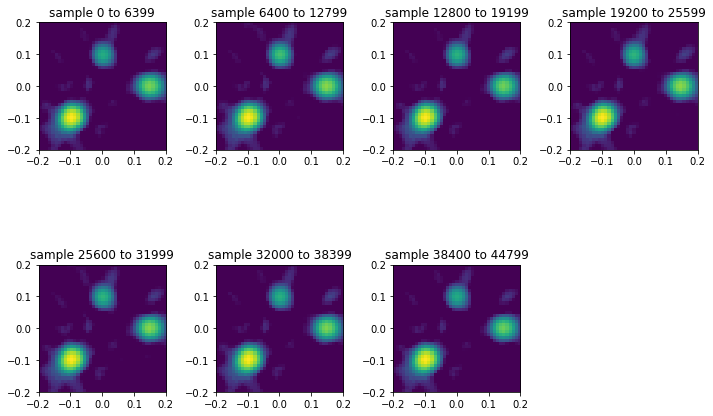

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
for i,r in enumerate(res):
    pm = r[0].reshape(rg.shape)
    Lm = acoular.L_p(pm)
    plt.subplot(2,4,i+1)
    plt.imshow(Lm.T, vmin=Lm.max()-15, origin='lower', extent=rg.extend())
    plt.title('sample %i to %i' % (i*6400,i*6400+6399))
plt.tight_layout();

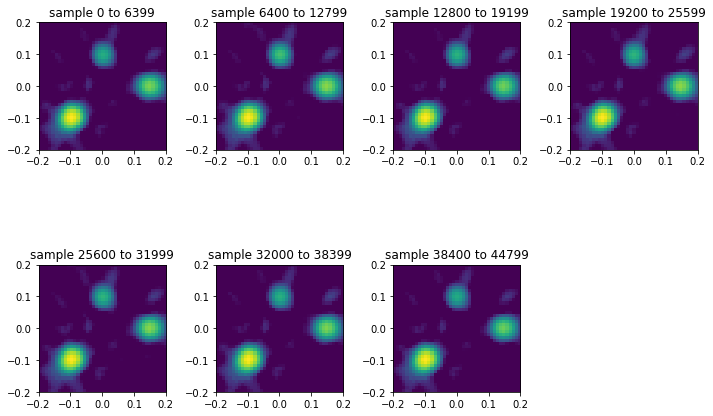

In [5]:
ft.source = ts
bt.source = ft
pt.source = bt

plt.figure(figsize=(10,7))
for i,r in enumerate(avgt.result(1)):
    pm = r[0].reshape(rg.shape)
    Lm = acoular.L_p(pm)
    plt.subplot(2,4,i+1)
    plt.imshow(Lm.T, vmin=Lm.max()-15, origin='lower', extent=rg.extend())
    plt.title('sample %i to %i' % (i*6400,i*6400+6399))
plt.tight_layout();